# MLP
Cell line 04 HT1080

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was a learn fail during CV.

MCC mean 0.1611

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 17:05:57.185309


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=4]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


2023-04-29 17:05:59.514471
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 1025
Num RCI: 1025
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 1025 sequences.

Training # 1 1
2023-04-29 17:06:03.467367
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [0.332965179937517, -2.273509500994392]
Variances [1.32532507 2.96240249]
Priors [0.64529755 0.35470245]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 579:236 71.04%
Computed class weights: {0: 1.7266949152542372, 1: 0.7037996545768567}
Valid 1:0 145:65 69.05%
FIT


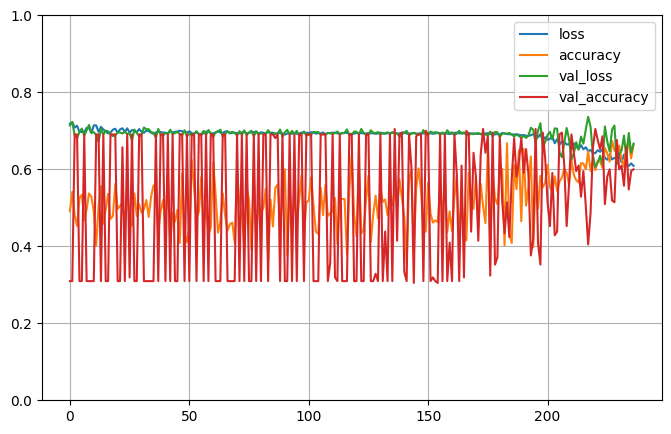


Testing # 1 1
2023-04-29 17:06:46.608214
PREDICT
Test 1:0 145:65 69.05%
Predict 1:0 193:17 91.90%
Test sizes (210, 1025) (210,)
Distrib of scores: 0.5008585 mean 0.0006390053 std
Range of scores: 0.49897665 to 0.5028195
Score threshold 0.5
Confusion matrix
 [[ 10  55]
 [  7 138]]
Normalized matrix
 [[0.04761905 0.26190476]
 [0.03333333 0.65714286]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


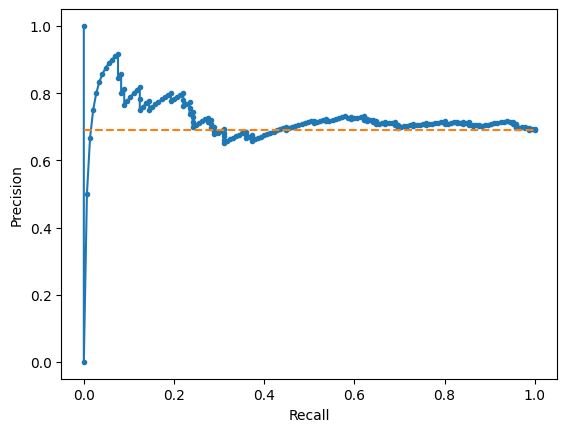

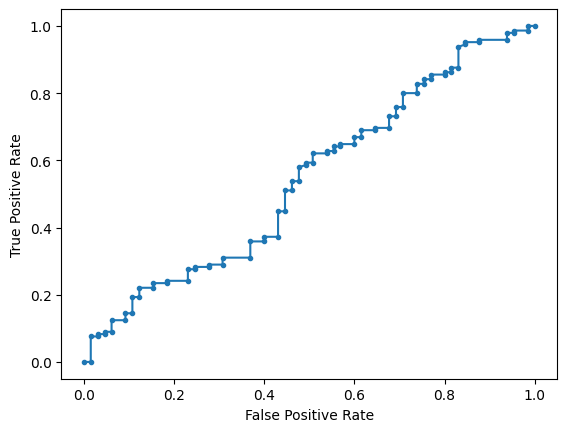

Accuracy: 70.48% Precision: 71.50% Recall: 95.17%
F1: 81.66% MCC: 0.1789
AUPRC: 72.15% AUROC: 54.39%
 accuracy [70.47619047619048]
 precision [71.50259067357513]
 recall [95.17241379310344]
 F1 [81.65680473372781]
 MCC [0.17892840316392972]
 AUPRC [72.15050833522491]
 AUROC [54.38726790450929]

Training # 1 2
2023-04-29 17:06:47.196344
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [0.3944972908639079, -2.1738351194259304]
Variances [1.32042298 2.70933315]
Priors [0.61539026 0.38460974]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 550:267 67.32%
Computed class weights: {0: 1.5299625468164795, 1: 0.7427272727272727}
Valid 1:0 141:67 67.79%
FIT


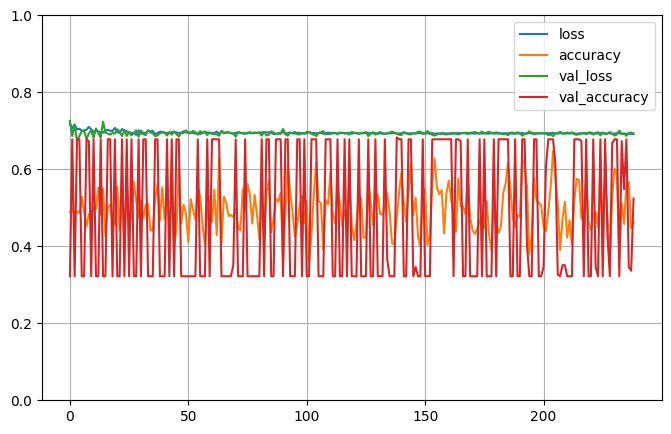


Testing # 1 2
2023-04-29 17:07:30.181436
PREDICT
Test 1:0 141:67 67.79%
Predict 1:0 207:1 99.52%
Test sizes (208, 1025) (208,)
Distrib of scores: 0.5002502 mean 9.03639e-05 std
Range of scores: 0.49999696 to 0.50056374
Score threshold 0.5
Confusion matrix
 [[  1  66]
 [  0 141]]
Normalized matrix
 [[0.00480769 0.31730769]
 [0.         0.67788462]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


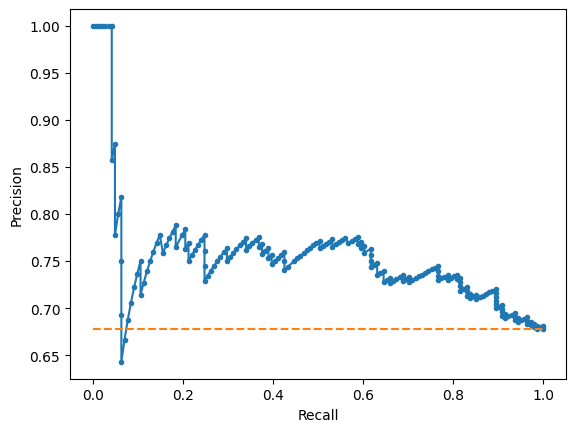

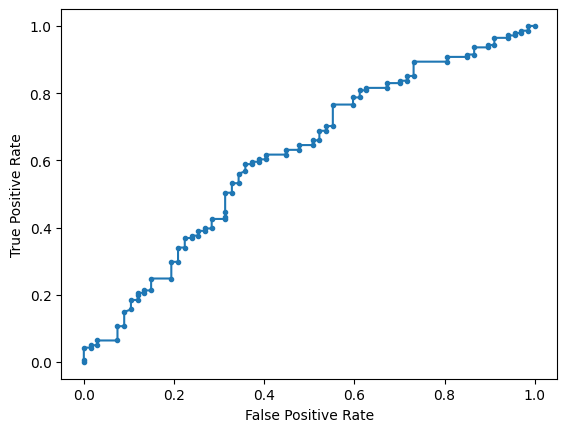

Accuracy: 68.27% Precision: 68.12% Recall: 100.00%
F1: 81.03% MCC: 0.1008
AUPRC: 75.38% AUROC: 61.53%
 accuracy [68.26923076923077]
 precision [68.11594202898551]
 recall [100.0]
 F1 [81.0344827586207]
 MCC [0.10082935342343956]
 AUPRC [75.37605760506013]
 AUROC [61.5327617232984]

Training # 1 3
2023-04-29 17:07:30.778286
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-2.0877111060288858, 0.46766894185368124]
Variances [2.59735604 1.28026007]
Priors [0.41500913 0.58499087]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 514:306 62.68%
Computed class weights: {0: 1.3398692810457515, 1: 0.7976653696498055}
Valid 1:0 141:64 68.78%
FIT


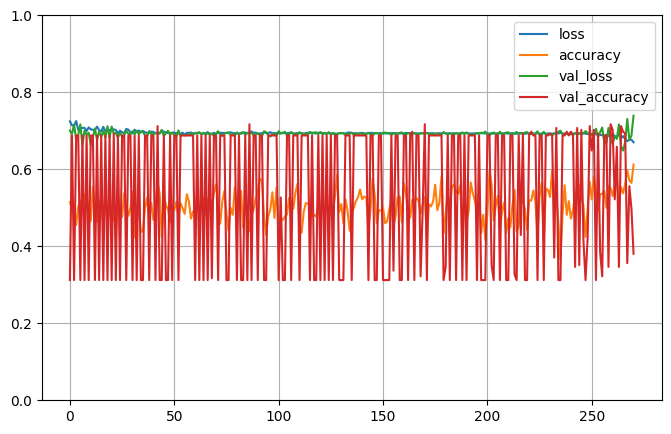


Testing # 1 3
2023-04-29 17:08:57.261943
PREDICT
Test 1:0 141:64 68.78%
Predict 1:0 153:52 74.63%
Test sizes (205, 1025) (205,)
Distrib of scores: 0.50009996 mean 0.0001692626 std
Range of scores: 0.49974796 to 0.50063854
Score threshold 0.5
Confusion matrix
 [[ 29  35]
 [ 23 118]]
Normalized matrix
 [[0.14146341 0.17073171]
 [0.11219512 0.57560976]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


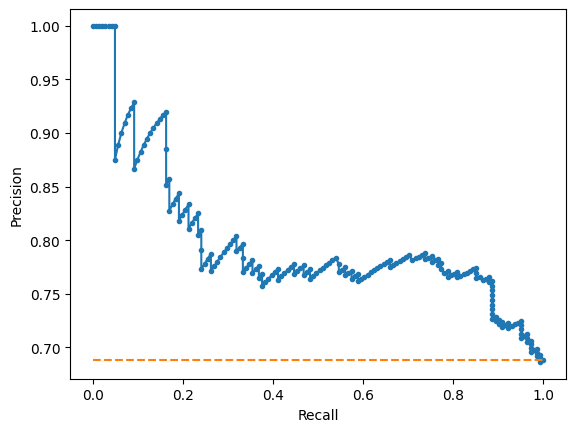

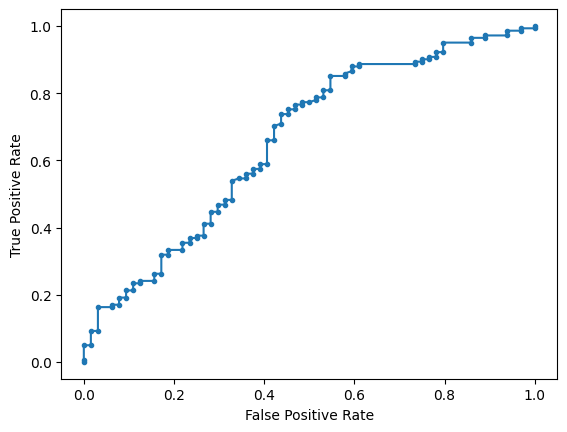

Accuracy: 71.71% Precision: 77.12% Recall: 83.69%
F1: 80.27% MCC: 0.3089
AUPRC: 79.74% AUROC: 66.02%
 accuracy [71.70731707317073]
 precision [77.12418300653596]
 recall [83.68794326241135]
 F1 [80.27210884353741]
 MCC [0.3088565330232052]
 AUPRC [79.73601217933641]
 AUROC [66.02393617021276]

Training # 1 4
2023-04-29 17:08:57.852731
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [0.4976797326821601, -2.066990693979779]
Variances [1.34218325 2.78678539]
Priors [0.61194447 0.38805553]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 549:276 66.55%
Computed class weights: {0: 1.4945652173913044, 1: 0.7513661202185792}
Valid 1:0 119:81 59.50%
FIT


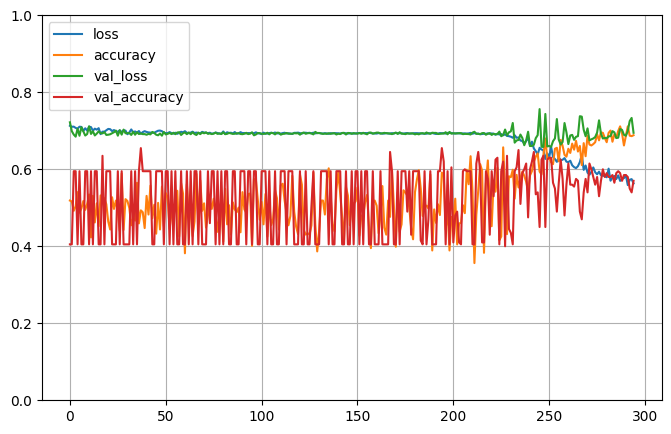


Testing # 1 4
2023-04-29 17:10:21.792886
PREDICT
Test 1:0 119:81 59.50%
Predict 1:0 158:42 79.00%
Test sizes (200, 1025) (200,)
Distrib of scores: 0.5005345 mean 0.00065514 std
Range of scores: 0.49921244 to 0.50305605
Score threshold 0.5
Confusion matrix
 [[ 27  54]
 [ 15 104]]
Normalized matrix
 [[0.135 0.27 ]
 [0.075 0.52 ]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


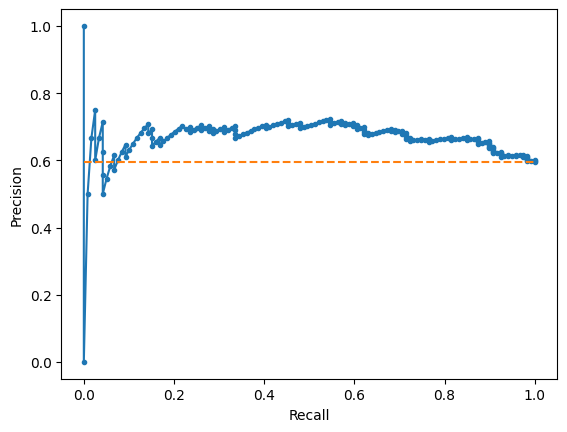

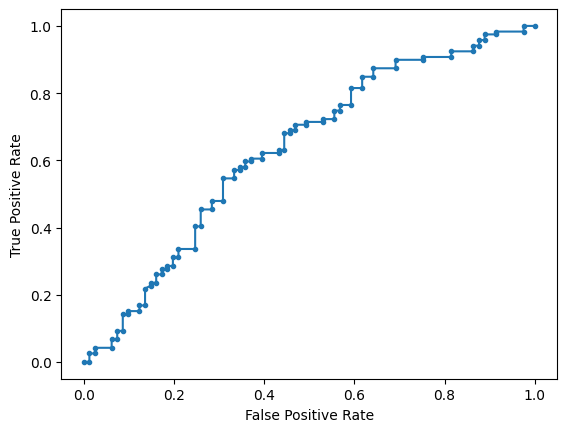

Accuracy: 65.50% Precision: 65.82% Recall: 87.39%
F1: 75.09% MCC: 0.2498
AUPRC: 66.78% AUROC: 63.34%
 accuracy [65.5]
 precision [65.82278481012658]
 recall [87.39495798319328]
 F1 [75.09025270758121]
 MCC [0.2498194828995464]
 AUPRC [66.78071900584244]
 AUROC [63.34163294947609]

Training # 1 5
2023-04-29 17:10:22.375802
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [0.4154628668808879, -2.162508251058047]
Variances [1.29329676 2.96157665]
Priors [0.60885246 0.39114754]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 547:276 66.46%
Computed class weights: {0: 1.4909420289855073, 1: 0.7522851919561243}
Valid 1:0 137:65 67.82%
FIT


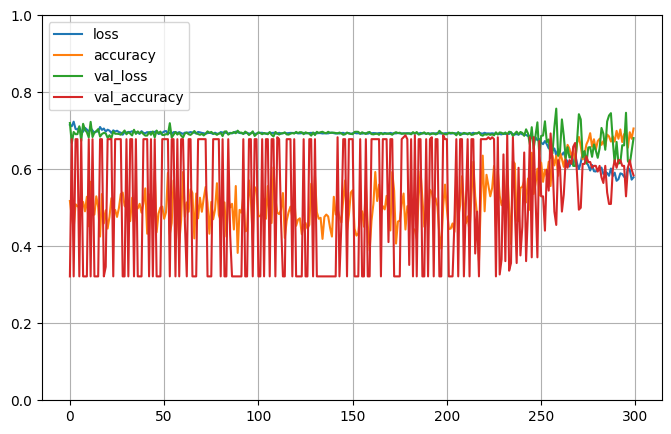


Testing # 1 5
2023-04-29 17:11:46.281077
PREDICT
Test 1:0 137:65 67.82%
Predict 1:0 93:109 46.04%
Test sizes (202, 1025) (202,)
Distrib of scores: 0.48307067 mean 0.17785713 std
Range of scores: 0.10656596 to 0.8989666
Score threshold 0.5
Confusion matrix
 [[45 20]
 [64 73]]
Normalized matrix
 [[0.22277228 0.0990099 ]
 [0.31683168 0.36138614]]
Extreme scores correct, pos:neg 38 24
Extreme scores incorrect pos:neg 2 30


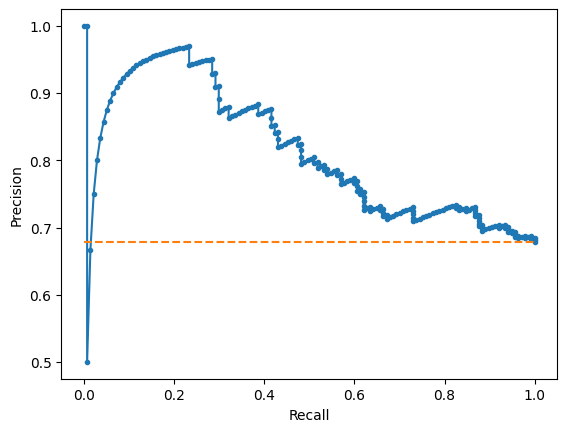

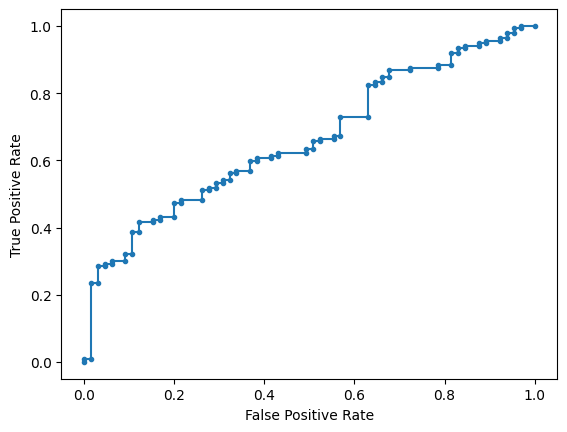

Accuracy: 58.42% Precision: 78.49% Recall: 53.28%
F1: 63.48% MCC: 0.2110
AUPRC: 81.08% AUROC: 66.14%
 accuracy [58.415841584158414]
 precision [78.49462365591397]
 recall [53.284671532846716]
 F1 [63.47826086956522]
 MCC [0.21102926766502328]
 AUPRC [81.07882389668137]
 AUROC [66.14261650758002]

Training # 2 1
2023-04-29 17:11:46.851564
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-2.026524136545443, 0.495179773718353]
Variances [2.59424979 1.27756552]
Priors [0.39771543 0.60228457]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 547:299 64.66%
Computed class weights: {0: 1.414715719063545, 1: 0.773308957952468}
Valid 1:0 109:70 60.89%
FIT


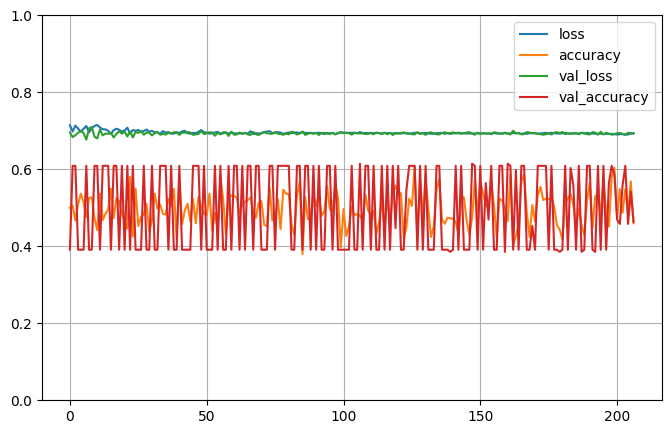


Testing # 2 1
2023-04-29 17:12:26.694351
PREDICT
Test 1:0 109:70 60.89%
Predict 1:0 146:33 81.56%
Test sizes (179, 1025) (179,)
Distrib of scores: 0.50013965 mean 0.00016770996 std
Range of scores: 0.4997872 to 0.5007409
Score threshold 0.5
Confusion matrix
 [[17 53]
 [16 93]]
Normalized matrix
 [[0.09497207 0.29608939]
 [0.08938547 0.51955307]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


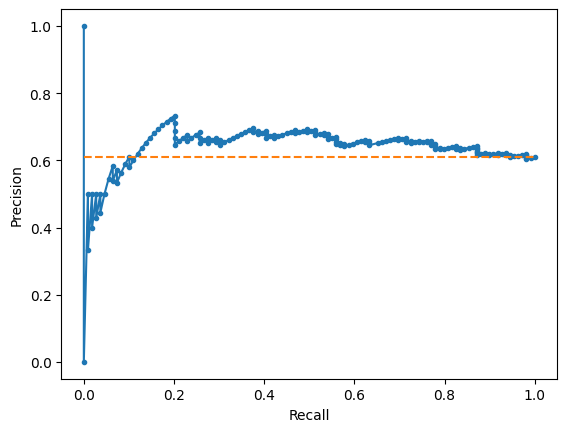

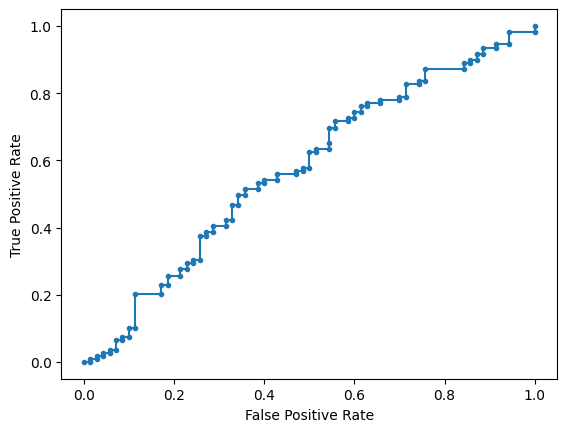

Accuracy: 61.45% Precision: 63.70% Recall: 85.32%
F1: 72.94% MCC: 0.1209
AUPRC: 63.96% AUROC: 57.43%
 accuracy [61.452513966480446]
 precision [63.6986301369863]
 recall [85.3211009174312]
 F1 [72.94117647058822]
 MCC [0.12089499115889513]
 AUPRC [63.962817236921296]
 AUROC [57.431192660550465]

Training # 2 2
2023-04-29 17:12:27.252920
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-2.1937179315514674, 0.4022507795776561]
Variances [2.80484761 1.27204342]
Priors [0.39826769 0.60173231]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 537:282 65.57%
Computed class weights: {0: 1.452127659574468, 1: 0.7625698324022346}
Valid 1:0 145:61 70.39%
FIT


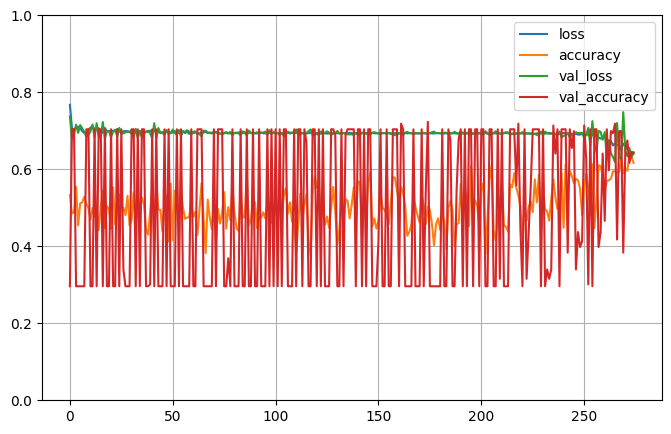


Testing # 2 2
2023-04-29 17:13:51.686501
PREDICT
Test 1:0 145:61 70.39%
Predict 1:0 192:14 93.20%
Test sizes (206, 1025) (206,)
Distrib of scores: 0.5001926 mean 0.00013905634 std
Range of scores: 0.49984613 to 0.50059944
Score threshold 0.5
Confusion matrix
 [[  9  52]
 [  5 140]]
Normalized matrix
 [[0.04368932 0.25242718]
 [0.02427184 0.67961165]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


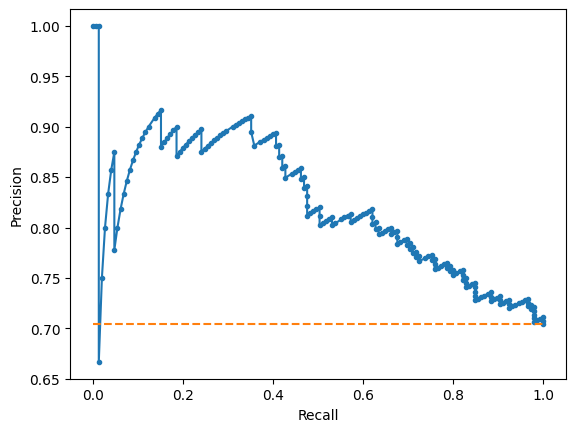

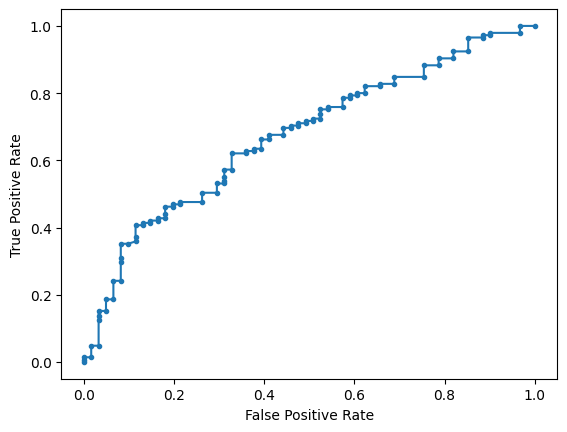

Accuracy: 72.33% Precision: 72.92% Recall: 96.55%
F1: 83.09% MCC: 0.2051
AUPRC: 82.10% AUROC: 67.43%
 accuracy [72.33009708737865]
 precision [72.91666666666666]
 recall [96.55172413793103]
 F1 [83.0860534124629]
 MCC [0.2050862051851427]
 AUPRC [82.10317437118032]
 AUROC [67.4335782928208]

Training # 2 3
2023-04-29 17:13:52.558776
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-2.0831601485129028, 0.4333513216796781]
Variances [2.83393966 1.34789546]
Priors [0.40238349 0.59761651]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 541:291 65.02%
Computed class weights: {0: 1.429553264604811, 1: 0.7689463955637708}
Valid 1:0 132:61 68.39%
FIT


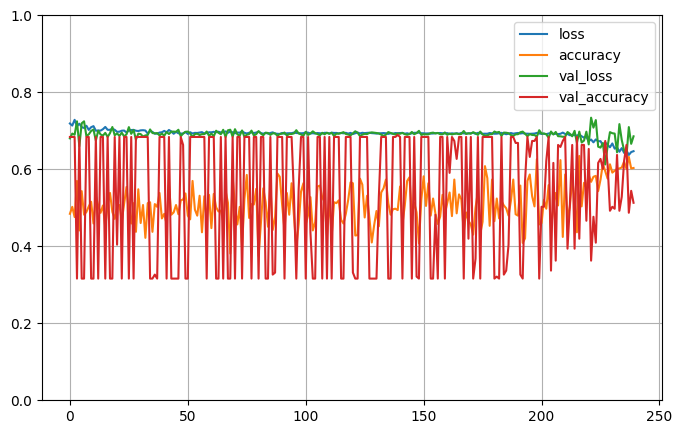


Testing # 2 3
2023-04-29 17:14:33.360990
PREDICT
Test 1:0 132:61 68.39%
Predict 1:0 152:41 78.76%
Test sizes (193, 1025) (193,)
Distrib of scores: 0.5002291 mean 0.0002927912 std
Range of scores: 0.4996788 to 0.5013197
Score threshold 0.5
Confusion matrix
 [[ 21  40]
 [ 20 112]]
Normalized matrix
 [[0.10880829 0.20725389]
 [0.10362694 0.58031088]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


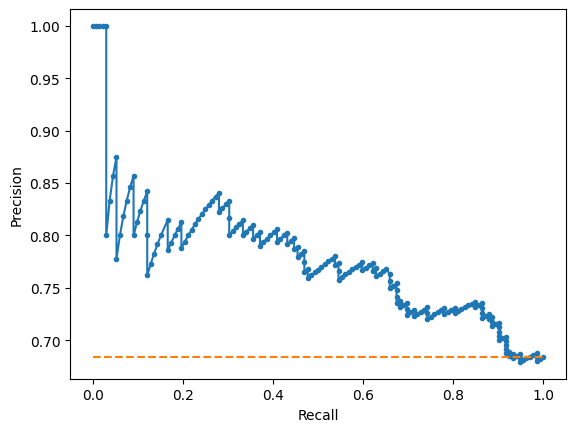

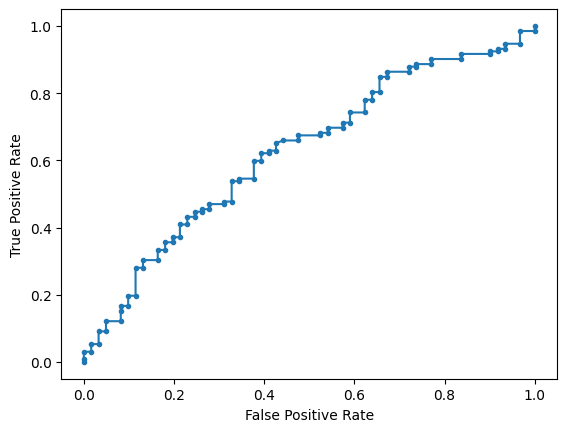

Accuracy: 68.91% Precision: 73.68% Recall: 84.85%
F1: 78.87% MCC: 0.2191
AUPRC: 77.57% AUROC: 62.79%
 accuracy [68.9119170984456]
 precision [73.68421052631578]
 recall [84.84848484848484]
 F1 [78.87323943661973]
 MCC [0.2190917939754278]
 AUPRC [77.56838701974219]
 AUROC [62.7856433184302]

Training # 2 4
2023-04-29 17:14:34.300528
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [0.46083751158935327, -2.1381057628824274]
Variances [1.26802713 2.96413242]
Priors [0.61282548 0.38717452]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 529:262 66.88%
Computed class weights: {0: 1.5095419847328244, 1: 0.7476370510396976}
Valid 1:0 148:86 63.25%
FIT


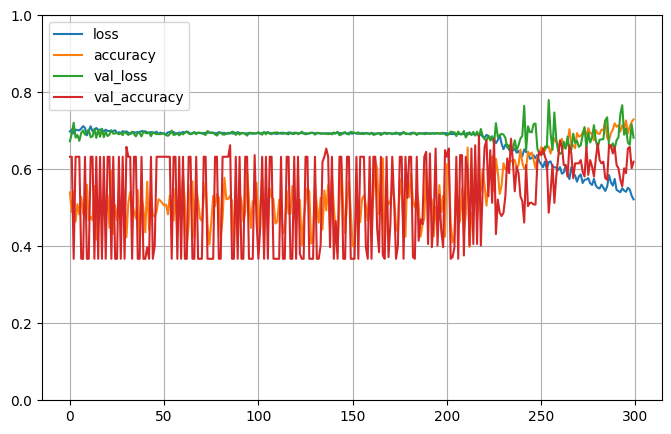


Testing # 2 4
2023-04-29 17:15:24.547214
PREDICT
Test 1:0 148:86 63.25%
Predict 1:0 131:103 55.98%
Test sizes (234, 1025) (234,)
Distrib of scores: 0.5615796 mean 0.2273445 std
Range of scores: 0.089336276 to 0.959134
Score threshold 0.5
Confusion matrix
 [[50 36]
 [53 95]]
Normalized matrix
 [[0.21367521 0.15384615]
 [0.22649573 0.40598291]]
Extreme scores correct, pos:neg 67 28
Extreme scores incorrect pos:neg 22 21


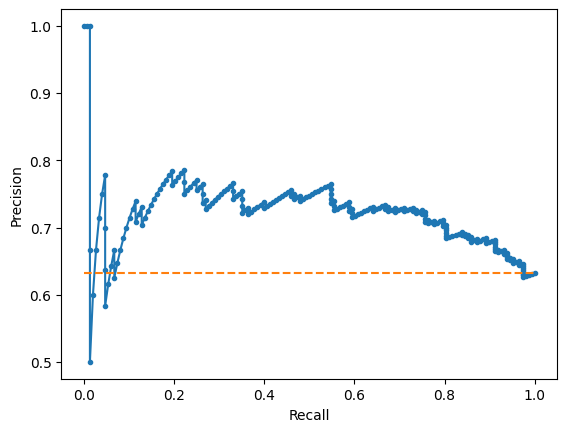

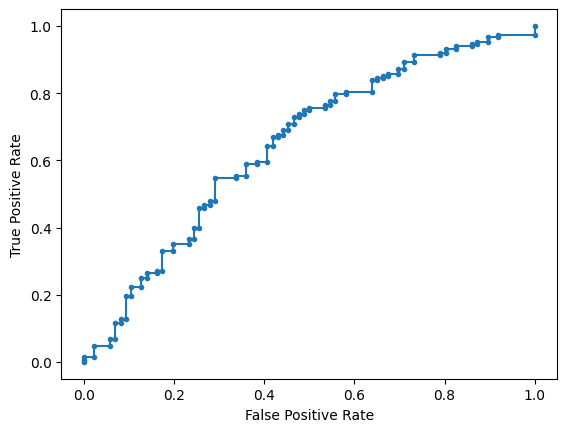

Accuracy: 61.97% Precision: 72.52% Recall: 64.19%
F1: 68.10% MCC: 0.2169
AUPRC: 72.14% AUROC: 64.42%
 accuracy [61.965811965811966]
 precision [72.51908396946564]
 recall [64.1891891891892]
 F1 [68.10035842293907]
 MCC [0.21686513159090634]
 AUPRC [72.13905015690227]
 AUROC [64.42489000628535]

Training # 2 5
2023-04-29 17:15:25.151230
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [0.31704838155628473, -2.322607836563029]
Variances [1.39545727 2.79823823]
Priors [0.65071891 0.34928109]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 580:232 71.43%
Computed class weights: {0: 1.75, 1: 0.7}
Valid 1:0 156:57 73.24%
FIT


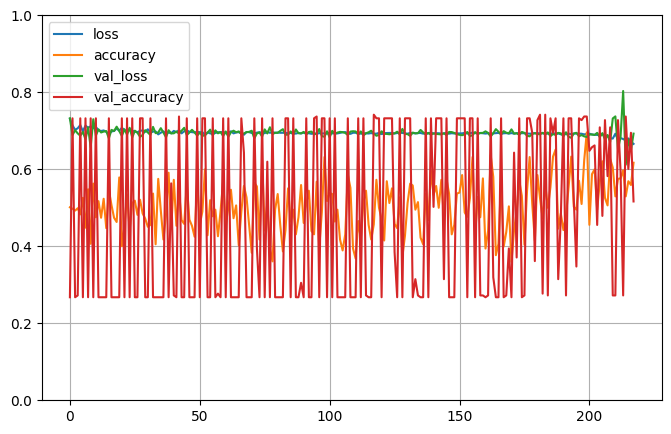


Testing # 2 5
2023-04-29 17:16:08.423602
PREDICT
Test 1:0 156:57 73.24%
Predict 1:0 211:2 99.06%
Test sizes (213, 1025) (213,)
Distrib of scores: 0.5005049 mean 0.00020869712 std
Range of scores: 0.49986583 to 0.50127923
Score threshold 0.5
Confusion matrix
 [[  2  55]
 [  0 156]]
Normalized matrix
 [[0.00938967 0.25821596]
 [0.         0.73239437]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


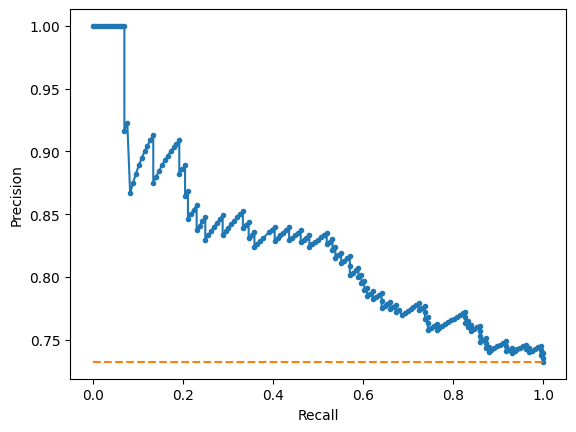

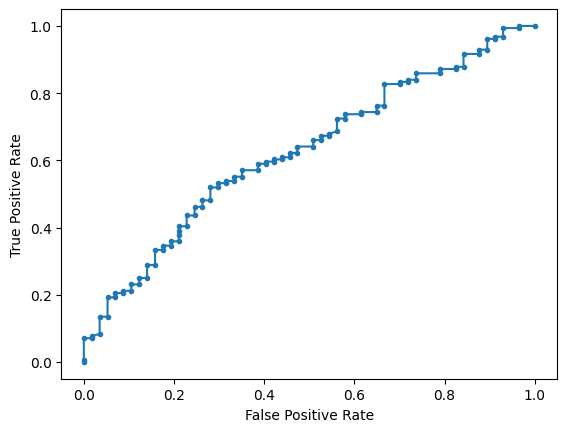

Accuracy: 74.18% Precision: 73.93% Recall: 100.00%
F1: 85.01% MCC: 0.1611
AUPRC: 82.43% AUROC: 62.70%
 accuracy [74.17840375586854]
 precision [73.93364928909952]
 recall [100.0]
 F1 [85.01362397820162]
 MCC [0.1610640597076474]
 AUPRC [82.43458065081006]
 AUROC [62.69680611785874]
2023-04-29 17:16:09.160113


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 67.32% std 5.28
 precision mean 71.78% std 4.69
 recall mean 85.05% std 15.40
 F1 mean 76.95% std 6.96
 MCC mean 0.1972 std 0.0606
 AUPRC mean 75.33% std 6.47
 AUROC mean 62.62% std 4.04
 accuracy [[70.47619047619048], [68.26923076923077], [71.70731707317073], [65.5], [58.415841584158414], [61.452513966480446], [72.33009708737865], [68.9119170984456], [61.965811965811966], [74.17840375586854]]
 precision [[71.50259067357513], [68.11594202898551], [77.12418300653596], [65.82278481012658], [78.49462365591397], [63.6986301369863], [72.91666666666666], [73.68421052631578], [72.51908396946564], [73.93364928909952]]
 recall [[95.17241379310344], [100.0], [83.68794326241135], [87.39495798319328], [53.284671532846716], [85.3211009174312], [96.55172413793103], [84.84848484848484], [64.1891891891892], [100.0]]
 F1 [[81.65680473372781], [81.0344827586207], [80.27210884353741], [75.09025270758121], [63.47826086956522], [72.94117647058822], [83.0860534124629], [78.87323943661973], [6